In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Generate training data
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [6]:
x_train, y_train = generate_linear(n=100)
x_train_1 , y_train_1 = generate_XOR_easy()

In [7]:
# Active function
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [8]:
# Display funtion
'''
  x: data
  y: corresponding data groundtruth
  y_pred: if given, plot the compare graph with this prediction result,
          the result is in range [0, 1], so value with greater than 0.5 
          will be recognized as Class 1 and less than 0.5 as Class 0
'''
def show_result(x, y, y_pred = None):
    if y_pred is not None:
        plt.subplot(1, 2, 1)
        plt.title("Ground truth", fontsize = 18)
        for i in range(x.shape[0]):
            if y[i] == 0:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')
    else:
        plt.title("Ground truth", fontsize = 18)
        for i in range(x.shape[0]):
            if y[i] == 0:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')
    if y_pred is not None:
        plt.subplot(1, 2, 2)
        plt.title("Predict result", fontsize = 18)
        for i in range(x.shape[0]):
            if y_pred[i] < 0.5:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')

# NN Architecture 
Input(2) -> FC1(2) -> FC(2) -> OUT(1)

In [9]:
'''
  x: input with 2 channel
  W: weight
'''
def forward(x, W):
    w1, w2, w3 = W
    # Forward
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3)
    y_pred = sigmoid(z3)
    return y_pred

In [10]:
# Random initial weight and return 
def init_weight():
    w1 = np.random.randn(2, 2)
    w2 = np.random.randn(2, 2)
    w3 = np.random.randn(2, 1)
    print("w1 initial: \n", w1)
    print("w2 initial: \n", w2)
    print("w3 initial: \n", w3)
    return [w1, w2, w3]

In [11]:
init_weight()

w1 initial: 
 [[ 0.209371   -0.20316815]
 [ 0.2915848   0.08031507]]
w2 initial: 
 [[-0.71037449 -1.11219333]
 [-0.39953354  2.68529366]]
w3 initial: 
 [[-0.61690016]
 [-0.363665  ]]


[array([[ 0.209371  , -0.20316815],
        [ 0.2915848 ,  0.08031507]]), array([[-0.71037449, -1.11219333],
        [-0.39953354,  2.68529366]]), array([[-0.61690016],
        [-0.363665  ]])]

In [12]:
# Save result
def save_result():
    global w1, w2, w3
    W = [w1, w2, w3]
    print('Result saved.')
    print(W)
    return W

In [13]:
# Train
loss_sum = 0
loss_type = 'Cross Entropy'
#loss_type = 'MSE'
'''
  x: training data
  y: corresponding groundtruth
  i: epoch now
  j: index of data now
  model: indicate which model, 0 for linear separable and 1 for XOR
'''
def train(x, y, loss_list = None,i = None, j = None, model = 0):
    global w1, w2, w3
    # Forward
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3)
    y_pred = sigmoid(z3)

    
    # Loss
    if loss_type == 'Cross Entropy':
        loss = -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
        loss_grad = (y_pred - y)/ (y_pred * (1-y_pred))

    if loss_type == 'MSE':
        loss = (y - y_pred)**2 /2.
        loss_grad = y_pred - y 
    
    w3_grad = np.zeros((2, 1))
    w2_grad = np.zeros((2, 2))
    w1_grad = np.zeros((2, 2))
    
    w3_grad[0] = loss_grad * derivative_sigmoid(y_pred) * a2[0]
    w3_grad[1] = loss_grad * derivative_sigmoid(y_pred) * a2[1]
    
    way_1 = loss_grad * derivative_sigmoid(y_pred) * w3[0] * derivative_sigmoid(a2[0])
    way_2 = loss_grad * derivative_sigmoid(y_pred) * w3[1] * derivative_sigmoid(a2[1])
    
    w2_grad[0][0] = way_1 * a1[0]
    w2_grad[0][1] = way_2 * a1[0]
    w2_grad[1][0] = way_1 * a1[1]
    w2_grad[1][1] = way_2 * a1[1]
    
    way_3 = way_1 * w2[0][0] * derivative_sigmoid(a1[0]) + \
            way_2 * w2[0][1] * derivative_sigmoid(a1[0])
    way_4 = way_1 * w2[1][0] * derivative_sigmoid(a1[1]) + \
            way_2 * w2[1][1] * derivative_sigmoid(a1[1])
    
    w1_grad[0][0] = way_3 * x[0]
    w1_grad[0][1] = way_4 * x[0]
    w1_grad[1][0] = way_3 * x[1]
    w1_grad[1][1] = way_4 * x[1]
    
    # Update weight
    w1 -= learning_rate * w1_grad
    w2 -= learning_rate * w2_grad
    w3 -= learning_rate * w3_grad
    global loss_sum
    loss_sum += abs(loss[0])
    
    if model == 0:
        NUM = 100.
        FREQ = 500
    else:
        NUM = 21.
        FREQ = 10000
        
    if loss_list is not None:
        if j == NUM - 1:
            loss_list.append(loss_sum/NUM /(i+1))
    
    if((i+1)%FREQ == 0 and j == NUM - 1):
        print("Epoch: {:5d}, loss: {}".format(i+1, loss_sum/NUM /(i+1)))
        loss_sum = 0
        

<>:9: SyntaxWarning: name 'loss_list' is assigned to before global declaration
<>:9: SyntaxWarning: name 'loss_list' is assigned to before global declaration
<>:9: SyntaxWarning: name 'loss_list' is assigned to before global declaration


w1 initial: 
 [[ 1.6313223  -0.44761197]
 [-1.2462719   0.2245235 ]]
w2 initial: 
 [[ 0.03423438 -1.65186259]
 [-1.63770341 -0.53045   ]]
w3 initial: 
 [[-1.12262747]
 [-0.38757461]]
Epoch:   500, loss: 0.22664181018041307
Epoch:  1000, loss: 0.015450695729032652
Epoch:  1500, loss: 0.00675395755446758
Epoch:  2000, loss: 0.0039162544999427895
Epoch:  2500, loss: 0.0025798722684858104
Epoch:  3000, loss: 0.001825094251294326
Epoch:  3500, loss: 0.001350460522216254
Epoch:  4000, loss: 0.001030732028421541
Epoch:  4500, loss: 0.0008050630106979305
Epoch:  5000, loss: 0.0006403818216345802
Epoch:  5500, loss: 0.0005171577940627455
Epoch:  6000, loss: 0.0004231169610324889
Epoch:  6500, loss: 0.0003501742527579558
Epoch:  7000, loss: 0.0002928087777377486
Epoch:  7500, loss: 0.00024714370522592043
Epoch:  8000, loss: 0.00021039556791473593
Epoch:  8500, loss: 0.00018052940212619524
Epoch:  9000, loss: 0.00015603470177740042
Epoch:  9500, loss: 0.00013577547070408254
Epoch: 10000, loss: 0.

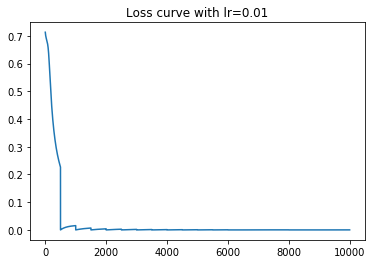

In [14]:
# Train linear separable model
epoch = 10000
learning_rate = 1e-2
w1, w2, w3 = init_weight()
loss_list = []

for i in range(epoch):
    for j in range(100):
        global loss_list
        train(x_train[j], y_train[j], loss_list, i, j)
        
print("Training process terminated.")
# Plot loss curve
plt.plot(loss_list)
plt.title("Loss curve with lr={}".format(learning_rate))
# Save result
W_s = save_result()

Epoch: 10000, loss: 0.5482566810045887
Epoch: 20000, loss: 0.10608940048861028
Epoch: 30000, loss: 0.022146703898545617
Epoch: 40000, loss: 0.01056609388897157
Epoch: 50000, loss: 0.006300700907682458
Epoch: 60000, loss: 0.004199800803247961
Epoch: 70000, loss: 0.003002780653920039
Epoch: 80000, loss: 0.0022545863449310436
Epoch: 90000, loss: 0.0017553630672875525
Epoch: 100000, loss: 0.001405557033116294
Epoch: 110000, loss: 0.0011509098327915667
Epoch: 120000, loss: 0.0009597605892519087
Epoch: 130000, loss: 0.0008126113318228421
Epoch: 140000, loss: 0.0006969168761923976
Epoch: 150000, loss: 0.0006043065841271946
Epoch: 160000, loss: 0.0005290209932610993
Epoch: 170000, loss: 0.0004669915937448922
Epoch: 180000, loss: 0.00041527805125298156
Epoch: 190000, loss: 0.000371712498123162
Epoch: 200000, loss: 0.00033466815160050525
Training processing terminated.
Result saved.
[array([[ 15.94350524,  20.49922234],
       [-18.5702394 , -24.16537763]]), array([[-10.80994404,  12.28735589],


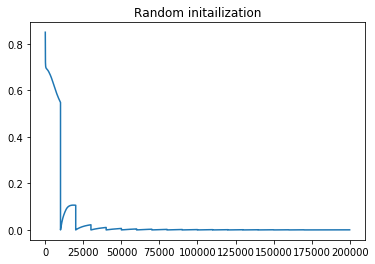

In [85]:
# Train XOR model
epoch = 200000
learning_rate = 1e-2
# Random initial
#w1, w2, w3 = init_weight()
# Same initailization

w1 = np.array([[-1.1014141, 1.24820549],[-2.24830822, -0.70606382]])
w2 = np.array([[-0.99334685, 0.02178998],[ 0.10302095, 0.26332976]])
w3 = np.array([[-0.26105551], [-2.14096867]])

# All zeros
'''
w1 = np.zeros((2, 2))
w2 = np.zeros((2, 2))
w3 = np.zeros((2, 1))
'''
# Huge
'''
w1 = np.array([[1e2, -1e2], [1e2, -1e2]])
w2 = np.array([[-1e2, 1e2], [-1e2, 1e2]])
w3 = np.array([[10.], [-10.]])
'''

# Near the best solution
'''
w1 = np.array([[15., 20.], [-18., -24.]])
w2 = np.array([[-10., 12.], [12., 3.5]])
w3 = np.array([[50.], [-37.]])
'''

loss_list_xor = []
for i in range(epoch):
    for j in range(21):
        train(x_train_1[j], y_train_1[j], loss_list_xor, i, j, 1)
        
print("Training processing terminated.")

# Plot loss curve
plt.plot(loss_list_xor)
plt.title("Random initailization".format(learning_rate))

# Save model
W_xor = save_result()


# Test

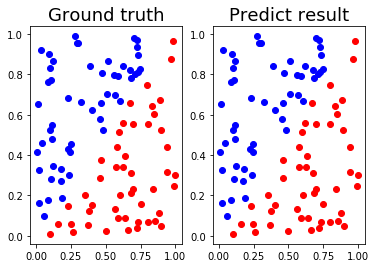

In [24]:
show_result(x_train, y_train, forward(x_train, W_s))

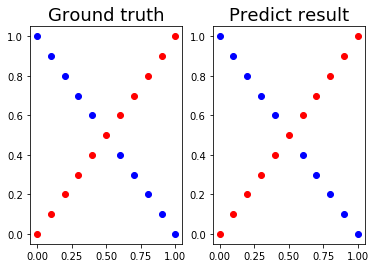

In [84]:
show_result(x_train_1, y_train_1, forward(x_train_1, W_xor))

In [750]:
forward(np.array([0.15, 0.15]), W_s)

array([0.02480135])

In [764]:
np.set_printoptions(precision=5, suppress=True)
forward(x_train_1, W_xor)

array([[0.06325],
       [0.98774],
       [0.00082],
       [0.98774],
       [0.00001],
       [0.98785],
       [0.     ],
       [0.99011],
       [0.     ],
       [0.99798],
       [0.     ],
       [0.     ],
       [0.98836],
       [0.     ],
       [0.99806],
       [0.00001],
       [0.9982 ],
       [0.00009],
       [0.9982 ],
       [0.00114],
       [0.9982 ]])

In [22]:
W_s

[array([[ 4.39060797, -9.82672791],
        [-3.4178775 ,  9.12361504]]), array([[-5.00895229,  5.97140126],
        [ 7.74337368, -9.06460215]]), array([[ 10.96421869],
        [-12.25795282]])]